In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
cwur=pd.read_csv('/content/cwurData.csv')
snc=pd.read_csv('/content/school_and_country_table.csv')
shang=pd.read_csv('/content/shanghaiData.csv')
times=pd.read_csv('/content/timesData.csv')

In [61]:
cwur.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [62]:
snc.head(5)

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [63]:
shang.head(5)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [64]:
times.head(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [65]:
# cwur dataset

In [66]:
cwur.shape

(2200, 14)

In [67]:
cwur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [68]:
np.sum(cwur.isnull())

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [69]:
cwur.drop('broad_impact', axis=1, inplace=True)

In [70]:
cwur.isnull().any()

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
patents                 False
score                   False
year                    False
dtype: bool

In [71]:
cwur.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000,2015.000000


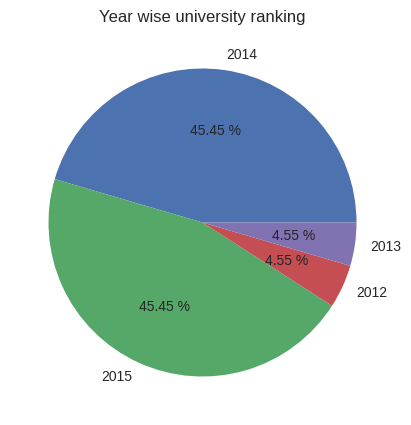

In [72]:
year_data=cwur['year'].value_counts()
plt.style.use('seaborn-v0_8')

plt.figure( figsize=(7,5))
plt.title('Year wise university ranking')

labels=['2014','2015','2012','2013']
plt.pie(year_data, labels = labels, autopct='%0.2f %%')

plt.show()

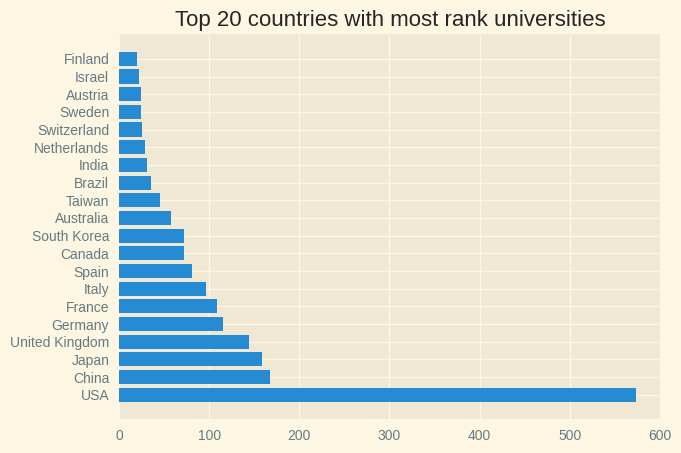

In [73]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(7,5))
plt.title('Top 20 countries with most rank universities')

country=cwur['country'].value_counts().head(20)
plt.barh( country.index ,country.values)

plt.show()


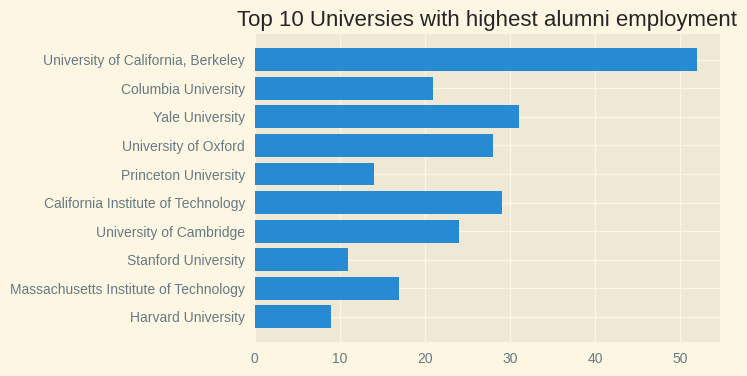

In [74]:
plt.style.use('Solarize_Light2')
top_data=cwur.head(10)
plt.figure(figsize=(6,4))

plt.title('Top 10 Universies with highest alumni employment')
plt.barh(top_data['institution'],top_data['alumni_employment'])

plt.show()

In [75]:
top_20 = cwur.head(20)
print('Top 20 universities in the world.')
top_20

Top 20 universities in the world.


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,16,78.55,2012


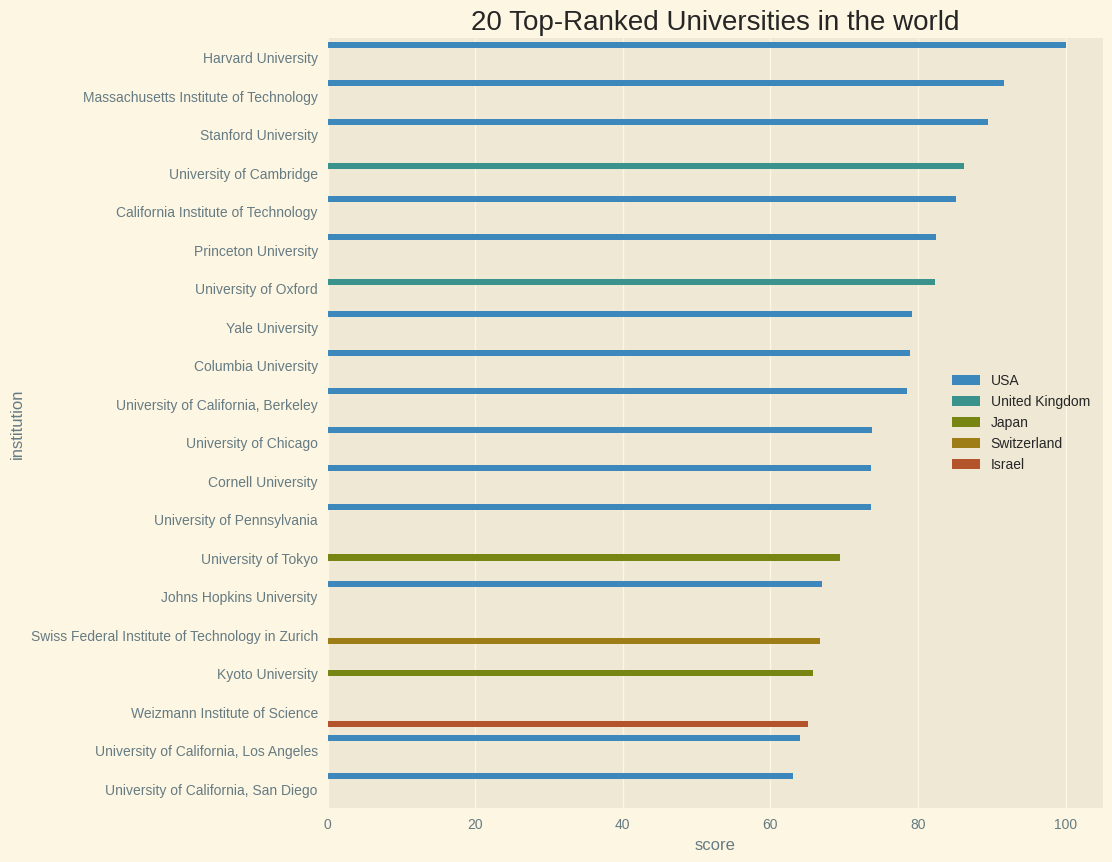

In [76]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,10))
plt.title("20 Top-Ranked Universities in the world",fontsize=20)
sns.barplot(data=top_20,x="score",y="institution",hue="country")
plt.legend()
plt.show()

In [77]:
cwur.drop('institution', axis=1, inplace=True)

In [78]:
cwur.drop('year', axis=1, inplace=True)

<ipython-input-79-727b8339f4d6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

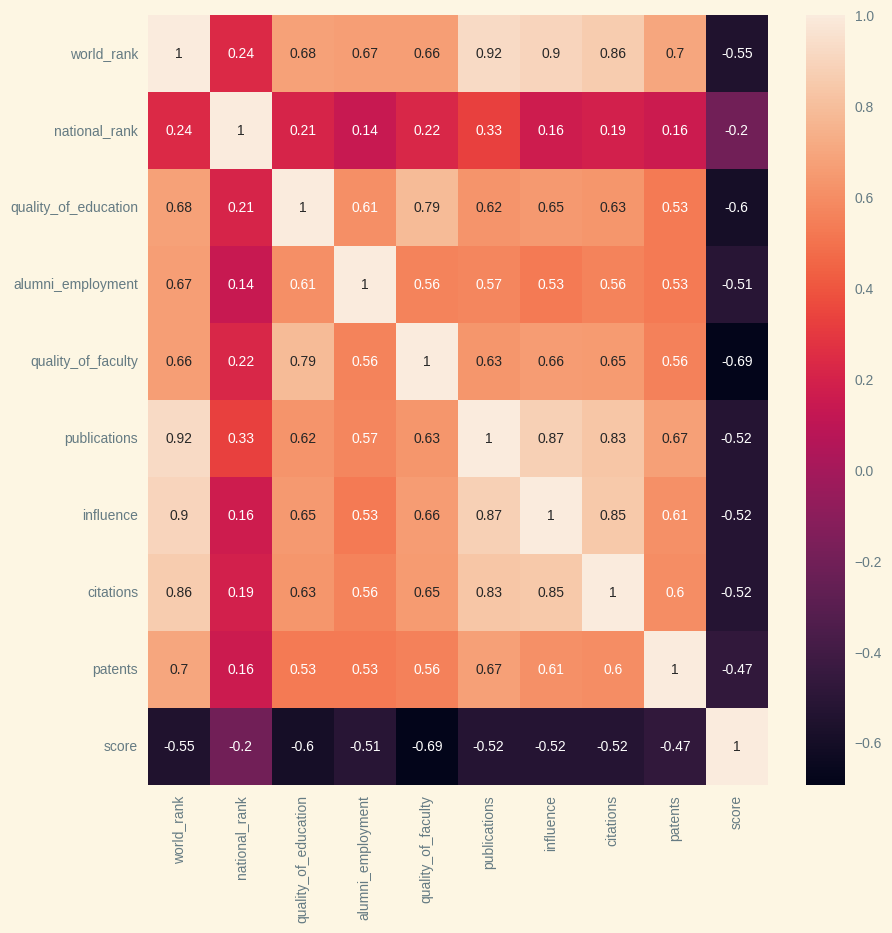

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(cwur.corr(),annot=True)

In [80]:
#  Analysing Times dataset

In [81]:
from plotly.offline import iplot
df = times.iloc[:100,:]

import plotly.graph_objs as go

trace1 = go.Scatter(
                    x=df.world_rank,
                    y=df.citations,
                    mode ="lines",
                    name ="citations",
                    marker = dict(color ='rgba(0,0,200,0.8)'),
                    text= df.university_name)
trace2 = go.Scatter(
                    x= df.world_rank,
                    y= df.teaching,
                    mode ="lines+markers",
                    name ="teaching",
                    marker= dict(color='rgba(200, 0, 0, 0.8)'),
                    text= df.university_name)
data =[trace1,trace2]
layout = dict(title ='Citation and Teaching vs World rank of top 100 Universities',
              xaxis = dict(title ='World Rank',ticklen= 5, zeroline =False),
             )
fig = dict(data = data, layout=layout)
iplot(fig)

In [82]:
df2016 = times[times.year == 2016].iloc[:10,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]
labels = df2016.university_name
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

Country most mentioned in 2016


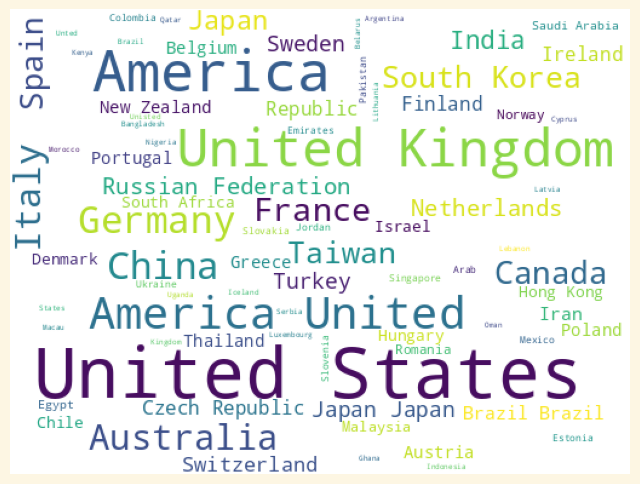

In [83]:
from wordcloud import WordCloud

x11 = times.country[times.year == 2016]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x11))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
print('Country most mentioned in 2016')
plt.show()

In [84]:
dataframe = times[times.year == 2015]
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 12, 200, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(10, 112, 90, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [85]:
# Analysing Shanghai dataset

In [86]:
import numpy as np

shang_features = ['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

shang["Score"] = (shang[shang_features].sum(axis=1) / len(shang_features)) * 0.1

# Round the "Score" values to the nearest integer
shang["Score_rank"] = (10 - shang["Score"]).apply(np.ceil).astype(int)

shang["award"] = shang["award"] * 0.1

shang.head(5)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,Score,Score_rank
0,1,Harvard University,1,100.0,100.0,10.00,100.0,100.0,100.0,72.4,2005,9.540000,1
1,2,University of Cambridge,1,73.6,99.8,9.34,53.3,56.6,70.9,66.9,2005,7.348333,3
2,3,Stanford University,2,73.4,41.1,7.22,88.5,70.9,72.3,65.0,2005,6.833333,4
3,4,"University of California, Berkeley",3,72.8,71.8,7.60,69.4,73.9,72.2,52.7,2005,6.933333,4
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,8.06,66.7,65.8,64.3,53.0,2005,6.740000,4


In [87]:
import plotly.graph_objs as go
from plotly.offline import iplot

def linelivechart(data, tr_1, tr_2):
    df = data.iloc[:10, :]

    trace1 = go.Scatter(
        x=df[tr_1],
        y=df[tr_2],
        mode="lines+markers",
        name="Score rank",
        marker=dict(color='rgba(16, 112, 2, 0.8)'),
        text=df.index
    )

    trace2 = go.Scatter(
        x=df['world_rank'],
        y=df['national_rank'],
        mode="lines+markers",
        name="National Rank",
        marker=dict(color='rgba(80, 26, 80, 0.8)'),
        text=df.index
    )

    data = [trace1, trace2]
    layout = dict(
        title='New Score Rank and national rank vs World Rank of Top 10 Universities',
        xaxis=dict(title='World Rank', ticklen=5, zeroline=True)
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)

In [88]:
linelivechart(shang, 'world_rank', 'Score_rank')

In [89]:
import pandas as pd
import plotly.express as px

data_2015 = shang[shang['year'] == 2015]
top_20_universities = shang.head(20)

fig = px.scatter(
    top_20_universities,
    x='world_rank',
    y='alumni',
    title='Interactive Scatter Plot of World Rank vs. Alumni (Year 2015) for Top 20 Universities',
    labels={'world_rank': 'World Rank', 'alumni': 'Alumni'},
    hover_name=top_20_universities['university_name'],
)

fig.show()

In [90]:
fig = px.bar(
    top_20_universities,
    x='university_name',
    y='award',
    title='Top 20 Universities with the Highest Award (Year 2015)',
    labels={'university_name': 'University Name', 'award': 'Award'},
    hover_name=top_20_universities['university_name'],
)

fig.show()

In [91]:
# Train Test Split of cwur dataset

In [92]:
cwur.drop(['world_rank', 'national_rank'], axis=1, inplace=True)

In [93]:
cwur.drop('country', axis=1, inplace=True)

In [94]:
cwur.head(5)

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,7,9,1,1,1,1,5,100.00
1,9,17,3,12,4,4,1,91.67
2,17,11,5,4,2,2,15,89.50
3,10,24,4,16,16,11,50,86.17
4,2,29,7,37,22,22,18,85.21


In [95]:
x=cwur.iloc[:,: -1]
y=cwur.score

In [96]:
x.head()

,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents
0,7,9,1,1,1,1,5
1,9,17,3,12,4,4,1
2,17,11,5,4,2,2,15
3,10,24,4,16,16,11,50
4,2,29,7,37,22,22,18


In [97]:
y.head()

0    100.00
1     91.67
2     89.50
3     86.17
4     85.21
Name: score, dtype: float64

In [98]:
print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [100]:
# Model Building

In [101]:
# 1) Linear Regression
lr = LinearRegression()
lr.fit (x_train, y_train)
y_pred1 = lr.predict(x_test)


print ("Prediction Evaluation using Linear Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_pred1))
print ("MSE: ",mean_squared_error(y_test, y_pred1))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_pred1)))
print ("R^2: ",r2_score(y_test, y_pred1))

Prediction Evaluation using Linear Regression
MAE:  2.630244278526174
MSE:  25.90443884843977
RMSE:  5.089640345686497
R^2:  0.49002501497866846


In [102]:
# 2) Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred2= dt.predict(x_test)

print ("Prediction Evaluation using Decision Tree Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_pred2))
print ("MSE: ",mean_squared_error(y_test, y_pred2))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_pred2)))
print ("R^2: ",r2_score(y_test, y_pred2))

Prediction Evaluation using Decision Tree Regression
MAE:  0.7685909090909088
MSE:  2.6667568181818178
RMSE:  1.6330207647736197
R^2:  0.947500145578729


In [103]:
# 3) Support Vector Regression
SV = SVR()
SV.fit(x_train, y_train)
y_pred3 = SV.predict(x_test)

print ("Prediction Evaluation using Support Vector Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_pred3))
print ("MSE: ",mean_squared_error(y_test, y_pred3))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_pred3)))
print ("R^2: ",r2_score(y_test, y_pred3))

Prediction Evaluation using Support Vector Regression
MAE:  1.5571247807848716
MSE:  23.017703434054262
RMSE:  4.7976768788710915
R^2:  0.546855539597443


In [104]:
# 4) Lasso Regression
lassoR = linear_model.Lasso(alpha=0.1)
lassoR.fit(x_train,y_train)
y_pred4= lassoR.predict(x_test)

print ("Prediction Evaluation using Lasso Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_pred4))
print ("MSE: ",mean_squared_error(y_test, y_pred4))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_pred4)))
print ("R^2: ",r2_score(y_test, y_pred4))

Prediction Evaluation using Lasso Regression
MAE:  2.6296320443102643
MSE:  25.901489977634238
RMSE:  5.0893506440050125
R^2:  0.4900830687490543


In [105]:
# 5) Random Forest Regression
rf = RandomForestRegressor(n_estimators = 100, random_state = 0,)
rf.fit(x_train, y_train)
y_pred5 = rf.predict(x_test)

print ("Prediction Evaluation using Random Forest Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_pred5))
print ("MSE: ",mean_squared_error(y_test, y_pred5))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_pred5)))
print ("R^2: ",r2_score(y_test, y_pred5))

Prediction Evaluation using Random Forest Regression
MAE:  0.5162916450216447
MSE:  1.2760579381148183
RMSE:  1.1296273447977516
R^2:  0.974878528282976


In [106]:
# Testing the model

In [107]:
y_pred=rf.predict([[7,8,1,2,1,2,6]])
print(y_pred)

[98.83788333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [108]:
import pickle
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [109]:
# Random Forest Regression Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf1 = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1
)

rf_random.fit(x_train, y_train)
y_predrf=rf_random.predict(x_test)

print(rf_random.best_params_)

print ("Prediction Evaluation using Hyper Parameter Tuned Random Forest Regression" )
print ("MAE: ",mean_absolute_error(y_test, y_predrf))
print ("MSE: ",mean_squared_error(y_test, y_predrf))
print ("RMSE: ", np.sqrt (mean_squared_error(y_test, y_predrf)))
print ("R^2: ",r2_score(y_test, y_predrf))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Prediction Evaluation using Hyper Parameter Tuned Random Forest Regression
MAE:  0.5293416010155463
MSE:  1.14915668036639
RMSE:  1.0719872575578453
R^2:  0.9773768054083013


In [110]:
import pickle
filename = 'model1.pkl'
pickle.dump(rf_random, open(filename, 'wb'))

In [111]:
y_pred1=rf_random.predict([[7,8,1,2,1,2,6]])
print(y_pred1)

[99.02637381]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

